In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('CPIAUCSL.csv', index_col=0, parse_dates=True)

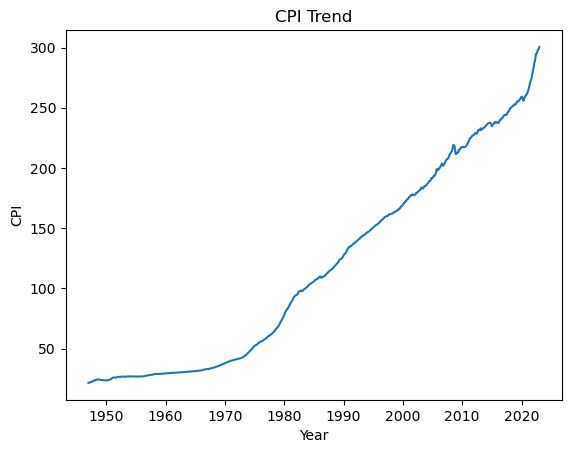

In [4]:
plt.plot(df.index, df['CPIAUCSL'])
plt.title('CPI Trend')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

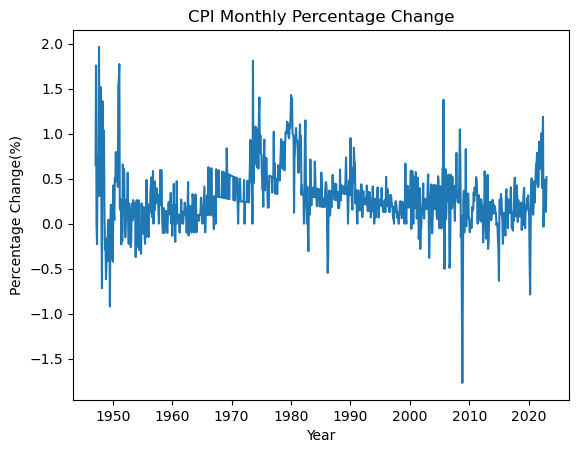

In [128]:
df['CPI_PCT_CHANGE'] = df['CPIAUCSL'].pct_change()*100
plt.plot(df.index, df['CPI_PCT_CHANGE'])
plt.title('CPI Monthly Percentage Change')
plt.xlabel('Year')
plt.ylabel('Percentage Change(%)')
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv('CPIAUCSL.csv', parse_dates=['DATE'], index_col='DATE')

# Fit the model
model = ARIMA(df['CPIAUCSL'], order=(1,1,1))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


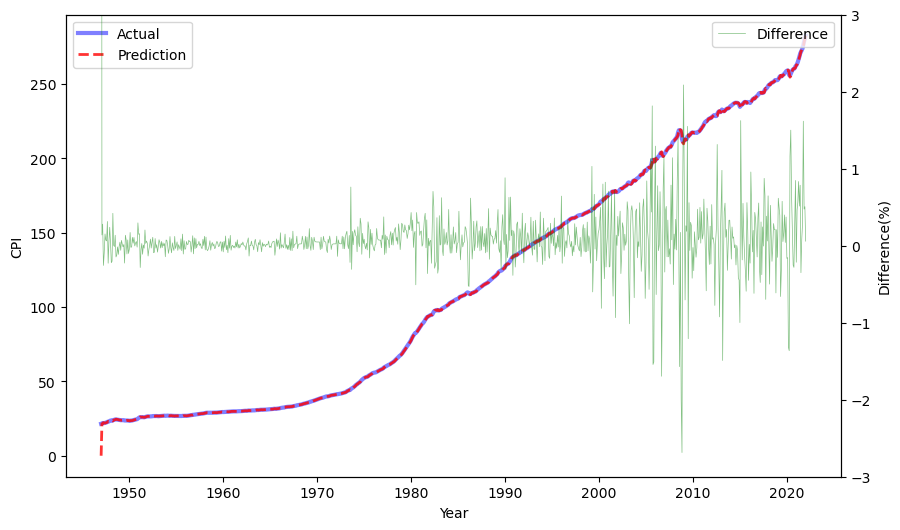

In [111]:
import matplotlib.pyplot as plt

# Calculate the difference between predicted and actual values
diff = (train_predicted - train_actual)/train_actual * 100

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the actual and predicted CPI values
ax1.plot(train_actual.index, train_actual, label='Actual', alpha=0.5, color='blue', linewidth=3)
ax1.plot(train_predicted.index, train_predicted, label='Prediction', alpha=0.8, color='red', linewidth=2, linestyle='dashed')

# Plot the difference between actual and predicted CPI values
ax2.plot(train_predicted.index, train_actual - train_predicted, label='Difference', alpha=0.5, color='green', linewidth=0.5)

# Set axis labels and legends
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI')
ax2.set_ylabel('Difference(%)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylim([-3, 3])

plt.show()


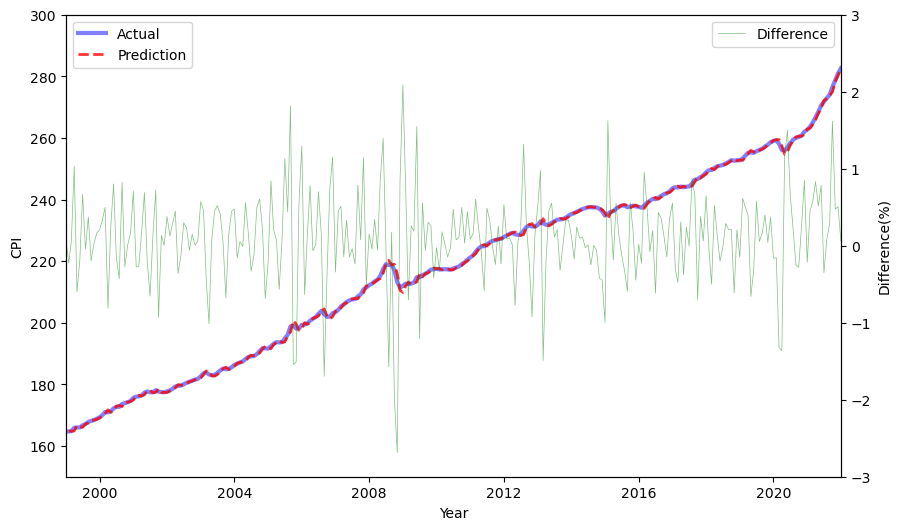

In [116]:
import matplotlib.pyplot as plt

# Calculate the difference between predicted and actual values
diff = (train_predicted - train_actual)/train_actual * 100

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the actual and predicted CPI values
ax1.plot(train_actual.index, train_actual, label='Actual', alpha=0.5, color='blue', linewidth=3)
ax1.plot(train_predicted.index, train_predicted, label='Prediction', alpha=0.8, color='red', linewidth=2, linestyle='dashed')

# Plot the difference between actual and predicted CPI values
ax2.plot(train_predicted.index, train_actual - train_predicted, label='Difference', alpha=0.5, color='green', linewidth=0.5)

# Set axis labels and legends
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI')
ax2.set_ylabel('Difference(%)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylim([-3, 3])
ax1.set_xlim(pd.to_datetime('1999-01-01'), pd.to_datetime('2022-01-01'))
ax1.set_ylim([150, 300])
plt.show()


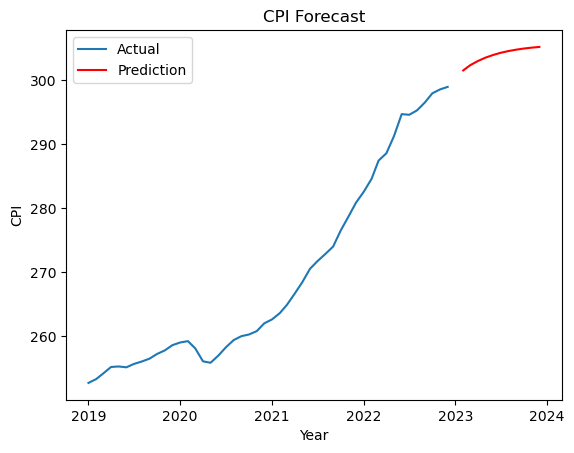

In [119]:
# Create a new dataframe for the forecast results
forecast_df = pd.DataFrame({'value': forecast}, index=pd.date_range(start=df.index[-1], periods=12, freq='MS'))
forecast_df.index.name = 'Year'
forecast_df.index = forecast_df.index.astype(str)

# Create the actual and predicted dataframes
actual = df.loc['2019-01-01':'2022-12-01']
pred = forecast_df.copy()

# Change the x-axis to match the actual dataframe
pred.index = pred.index.astype('datetime64[ns]')

# Plot the original data and the forecast
plt.plot(actual.index, actual['CPIAUCSL'], label='Actual')
plt.plot(pred.index, pred['value'], label='Prediction', color='red')
plt.title('CPI Forecast')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.show()

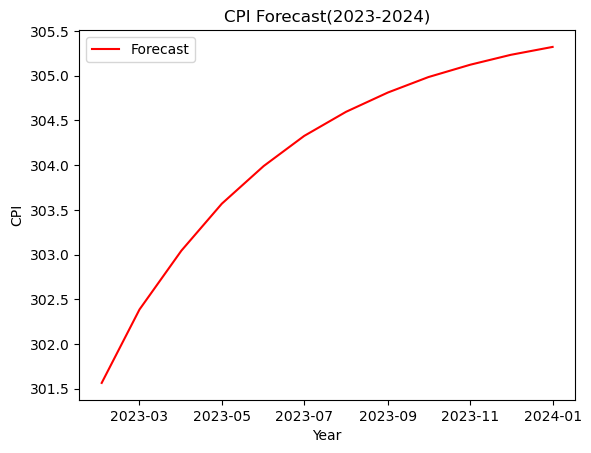

In [120]:
# Plot the forecast
plt.plot(forecast.index, forecast.values, label='Forecast', color='red')
plt.title('CPI Forecast(2023-2024)')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.show()